Jipsa chelora veetil

Housing Prices Prediction Project 

Project idea – The dataset has house prices of the Boston residual areas.
The expense of the house varies according to various factors like crime rate, number of rooms, etc. 
Dataset: http://lib.stat.cmu.edu/datasets/boston


In [190]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns


In [191]:
dataset="http://lib.stat.cmu.edu/datasets/boston"

In [192]:
df = pd.read_csv(dataset, sep="\s+",skiprows=21,header=None)

In [193]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [194]:
x = np.hstack([df.values[::2, :], df.values[1::2, :2]])
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [195]:
y = df.values[1::2, 2]
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [196]:
data_x=pd.DataFrame(x,columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATION","B","LSTAT"])

In [197]:
data_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [198]:
data_y=pd.DataFrame(y,columns=["Target"])
data_y

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [199]:
data_x['Target']=data_y

In [200]:
data_x=data

In [201]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


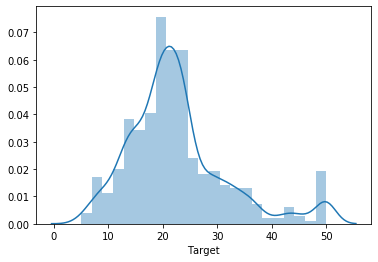

In [202]:
sns.distplot(data['Target'])
plt.show()

from the above figure, it is clear that target variable is normally distributed.

In [203]:
corr=data.corr()

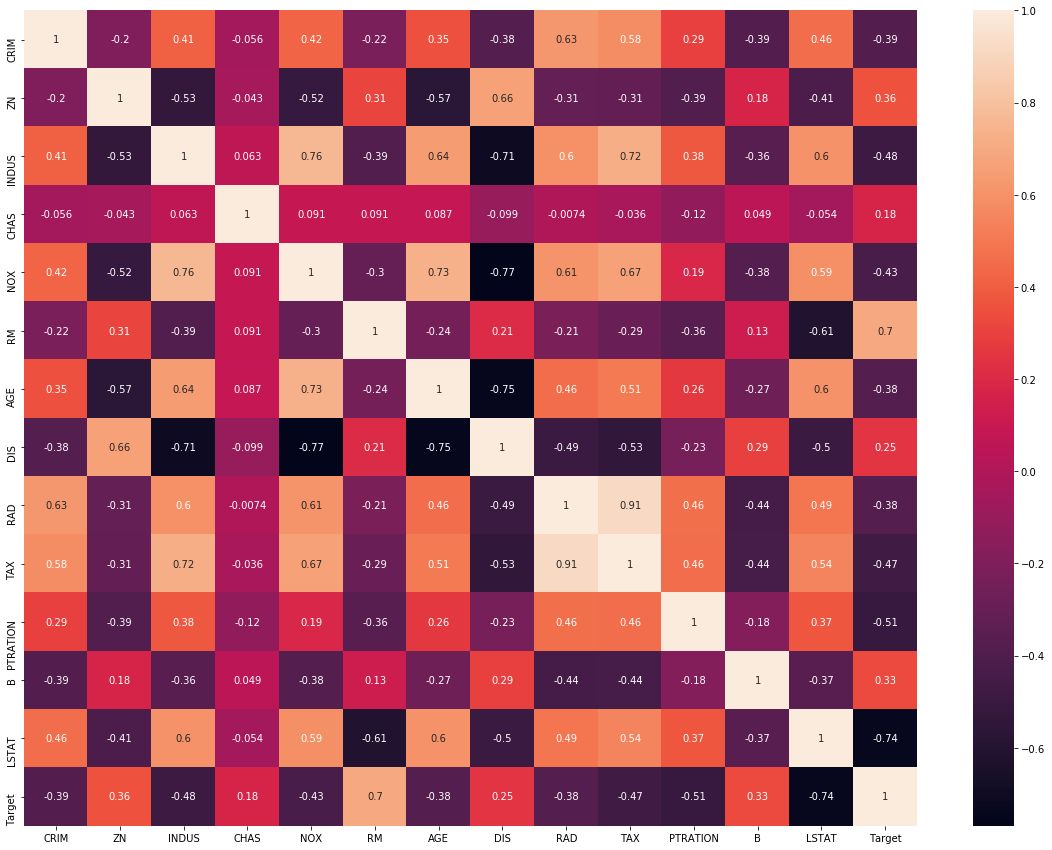

In [204]:
plt.figure(figsize=(20,15))
sns.heatmap(data=corr,annot=True)

In [205]:
x.shape

(506, 13)

In [206]:
y.shape

(506,)

In [207]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)


In [208]:
model1=linear_model.LinearRegression()

In [209]:
model1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [210]:
model1.coef_

array([-1.11254928e-01,  5.18680433e-02,  1.43321667e-02,  2.51154050e+00,
       -1.49265180e+01,  3.93483238e+00, -4.64570429e-03, -1.51844278e+00,
        2.87110592e-01, -1.12144664e-02, -9.34072213e-01,  8.32690858e-03,
       -5.59947918e-01])

In [211]:
model1.intercept_

34.954060147991214

In [212]:
y_pred=model1.predict(x_test)
y_pred

array([19.16055135, 10.96378192, 38.43550554, 27.18329776, 41.01074141,
       27.7232947 , 10.53750559, 36.38954094, 29.24610838, 35.06764258,
       13.18757275,  7.66817083, 15.24934334, 24.53880244, 16.44215677,
       28.92308705, 22.95007861, 22.28714213, 20.80227393,  7.14070734,
       20.95828057, 25.22932401, 30.44054754, 33.49475213, 28.45447373,
       35.81507893,  5.14941596, 14.51846595, 25.6779436 , 22.99411898,
       34.84256069, 18.45717323, 19.66505293, 22.61744593, 25.37946956,
       27.28328316, 32.44922934, 25.66702316, 14.0708326 , 14.16685081,
       21.7080269 , 21.69845405, 36.25388477, 35.31915298, 23.17277519,
       19.0433492 , 19.8442441 , 21.21196693, 25.69507408, 24.54038018,
       19.96398497, 16.76373059, 32.0817688 , 16.70295782, 22.28601067,
       24.42791868, 20.86517394,  5.45261105, 19.82071383, 28.31791485,
       24.21238266, 21.99687327, 20.13472391,  9.64660211, 14.67763073,
       17.01272424, 13.30779662, 20.17402474, 35.45414661, 36.04

In [213]:
pred_table=pd.DataFrame({'target_y_values':y_test,"predicted_y_values":y_pred})
pred_table

,target_y_values,predicted_y_values
0,18.5,19.160551
1,12.7,10.963782
2,21.9,38.435506
3,22.0,27.183298
4,50.0,41.010741
...,...,...
97,22.8,24.692206
98,19.4,23.212746
99,13.4,13.782768
100,8.8,2.890663


Text(0, 0.5, 'prediction')

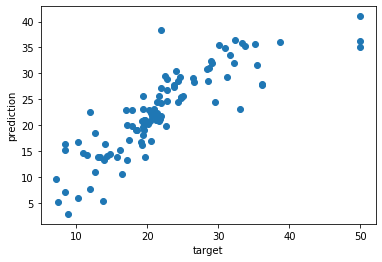

In [214]:
plt.scatter(y_test,y_pred)
plt.xlabel("target")
plt.ylabel("prediction")

In [215]:
model1.score(x_test,y_test)

0.7079627967134531

In [216]:
model2=RandomForestRegressor(random_state=33)

In [217]:
model2.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=33, verbose=0, warm_start=False)

In [218]:
model2.score(x_test,y_test)

0.7711688898657296

In [219]:
y_pred=model2.predict(x_test)
y_pred

array([19.563, 14.644, 46.488, 26.283, 47.258, 22.318, 17.33 , 31.407,
       24.229, 39.531, 16.522, 14.146, 16.516, 22.114, 15.23 , 30.183,
       21.571, 20.824, 20.778,  7.108, 21.094, 23.67 , 30.12 , 37.021,
       26.585, 36.699,  8.38 , 16.04 , 21.636, 16.023, 31.334, 14.796,
       19.276, 21.279, 27.984, 28.45 , 34.628, 22.409, 16.453, 12.377,
       20.328, 23.848, 44.264, 32.631, 30.966, 19.402, 15.191, 20.045,
       20.51 , 22.875, 20.37 , 11.384, 30.593, 14.314, 18.671, 24.262,
       20.361, 11.697, 20.9  , 30.362, 23.103, 20.452, 21.107,  8.605,
       15.74 , 23.005, 15.401, 20.963, 29.567, 44.661, 16.397, 22.947,
       26.347, 30.651, 20.385, 24.141, 27.536, 19.951, 18.805, 15.59 ,
       15.266,  8.659, 12.903, 20.174, 19.531, 29.259, 12.452, 18.933,
       25.917, 34.477, 20.392, 20.515, 31.677, 42.369, 15.325, 34.105,
       21.329, 23.942, 19.955, 11.953,  8.793, 26.062])

Text(0, 0.5, 'prediction')

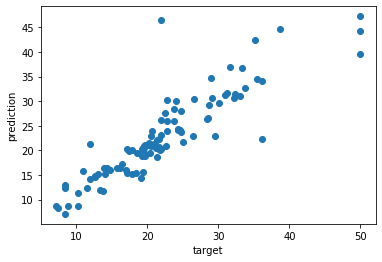

In [220]:
plt.scatter(y_test,y_pred)
plt.xlabel("target")
plt.ylabel("prediction")